### Here, I check jun rui's simulation results for Null solution cases:

Knapsack Problem (Capacity: 2)
Profits:  5.0  1.0
Weights:  3.0  3.0

It seems very problematic. So we've decided to omit null solution cases altogether. Anyways it's easy to justify: irl it's very easy to check null solution cases in O(n) time. Just need to iterate through the list of weights and check if all the weights are below the capacity. So we don't need a quantum algorithm for it anyway.

In [220]:
import numpy as np
from scipy.linalg import expm
import scipy
import matplotlib.pyplot as plt
import time

In [221]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [222]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [223]:
Values = [5, 1]
Weights = [3, 3]
Ancil = [1, 1]
num_dimension = 2**(len(Values) + len(Ancil))

alpha = 1e5
beta = 1.1
gamma = max(Values) + 1
T = 1e3
dt = 0.01
t_axis = np.arange(0, T, dt)[0:]

In [224]:
# Create creation operator
a_dag = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(num_dimension - 1)
a_dag[n_indices + 1, n_indices] = np.sqrt(n_indices + 1)
# print(a_dag)

# Create annihilation operator
a = np.zeros((num_dimension, num_dimension))
n_indices = np.arange(1, num_dimension)
a[n_indices - 1, n_indices] = np.sqrt(n_indices)
# print(a)

# print(a_dag @ a)

In [225]:
H0 = (a_dag + a)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-6.630878198393129
[-0.     0.    -0.     0.001 -0.004  0.011 -0.026  0.056 -0.106  0.182
 -0.281  0.389 -0.475  0.5   -0.428  0.25 ]


In [ ]:
eyes = [sigmaI for _ in range(len(Values) + len(Ancil))]
profit_matrix = np.zeros((num_dimension, num_dimension))
weight_matrix = np.zeros((num_dimension, num_dimension))
penalty_matrix = np.zeros((num_dimension, num_dimension))

for i in range(len(Values)):
    nose = eyes.copy()
    nose[i] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    profit_matrix += Values[i] * tensorproduct
    weight_matrix += Weights[i] * tensorproduct
    
for j in range(len(Ancil)):
    nose = eyes.copy()
    nose[j + len(Values)] = sigmaBin
    tensorproduct = nose[0]
    for sigma in nose[1:]:
        tensorproduct = np.kron(tensorproduct, sigma)
    penalty_matrix += Ancil[j] * tensorproduct

Hp = -profit_matrix + gamma * (weight_matrix - penalty_matrix)**2


eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
print(eigenvals_Hp)
print(eigenvals_Hp.argsort())
ground_idx_Hp = eigenvals_Hp.argsort()[0]
ground_idx_Hp_degen = eigenvals_Hp.argsort()[1]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])
print(eigenvals_Hp[ground_idx_Hp_degen])
print(eigenvecs_Hp[:, ground_idx_Hp_degen])



TypeError: array type complex128 is unsupported in linalg

In [ ]:
def H(t, T=1, alpha=1, beta=1):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

In [ ]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
if eigenvals_Hp[ground_idx_Hp] == eigenvals_Hp[ground_idx_Hp_degen]:
    psi_correct_degen = eigenvecs_Hp[:, ground_idx_Hp_degen]
else:    
    psi_correct_degen = np.zeros(eigenvecs_Hp[:, ground_idx_Hp_degen].shape)
print(psi_correct)
print(psi_correct_degen)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


alpha = 1.00e+12, loop time: 19.230375051498413, accuracy: 0.0014210892782659673
alpha = 1.00e+13, loop time: 17.84330701828003, accuracy: 0.0016910894219620022
alpha = 1.00e+14, loop time: 20.271103858947754, accuracy: 989042566153.3516


/var/folders/9n/n42mcm4j3zd6tllvscs4_ych0000gn/T/ipykernel_55169/1916801846.py:15: RuntimeWarning: overflow encountered in scalar power
  accuracy = np.abs( np.dot(psi_correct, psi_final) )**2 + np.abs( np.dot(psi_correct_degen, psi_final) )**2


alpha = 1.00e+15, loop time: 23.08551597595215, accuracy: inf


/var/folders/9n/n42mcm4j3zd6tllvscs4_ych0000gn/T/ipykernel_55169/1916801846.py:11: RuntimeWarning: overflow encountered in matmul
  junrui_unitary = expm(-1j * H(t, T=T, alpha=alpha, beta=beta) * dt) @ junrui_unitary
/var/folders/9n/n42mcm4j3zd6tllvscs4_ych0000gn/T/ipykernel_55169/1916801846.py:11: RuntimeWarning: invalid value encountered in matmul
  junrui_unitary = expm(-1j * H(t, T=T, alpha=alpha, beta=beta) * dt) @ junrui_unitary


alpha = 1.00e+16, loop time: 27.815725803375244, accuracy: nan
alpha = 1.00e+17, loop time: 22.243555068969727, accuracy: nan


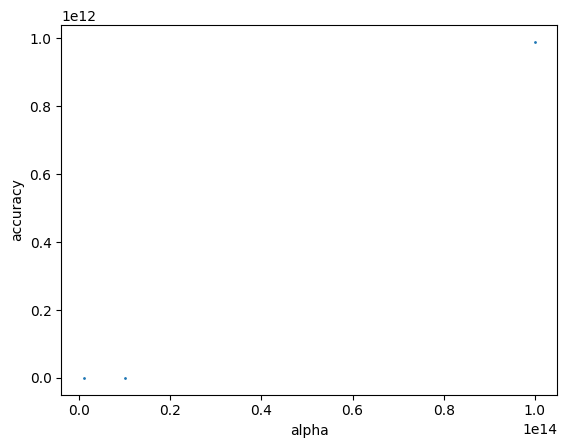

4
max accuracy: nan
alpha_optimal: 10000000000000000


In [ ]:
# alpha_list = np.power(1.5, np.arange(0, 10, 1))
# alpha_list = np.power(1.5, np.arange(23, 25, 1))
alpha_list = np.power(10, np.arange(14, 18, 1))
accuracy_list = []

for alpha in alpha_list:
    start_time = time.time()

    junrui_unitary = np.identity(len(H0), dtype=np.clongdouble)
    for t in t_axis:
        junrui_unitary = expm(-1j * H(t, T=T, alpha=alpha, beta=beta) * dt) @ junrui_unitary

    psi_final = junrui_unitary @ psi_ini

    accuracy = np.abs( np.dot(psi_correct, psi_final) )**2 + np.abs( np.dot(psi_correct_degen, psi_final) )**2
    accuracy_list.append(accuracy)

    end_time = time.time()
    print(f"alpha = {alpha:.2e}, loop time: {end_time - start_time}, accuracy: {accuracy}")

plt.scatter(alpha_list, accuracy_list, s=1)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()
accuracy_list = np.array(accuracy_list)
print(accuracy_list.argmax())
print(f"max accuracy: {accuracy_list[accuracy_list.argmax()]}")
print(f"alpha_optimal: {alpha_list[accuracy_list.argmax()]}")


In [ ]:
# beta_list = np.arange(1e-2, 5e0, 1e-2)
# accuracy_list = []

# for beta in beta_list:
#     start_time = time.time()

#     junrui_unitary = np.identity(len(H0))
#     for t in t_axis:
#         junrui_unitary = expm(-1j * H(t, T=T, alpha=alpha, beta=beta) * dt) @ junrui_unitary

#     psi_final = junrui_unitary @ psi_ini

#     accuracy = np.abs( np.dot(psi_correct, psi_final) )**2 + np.abs( np.dot(psi_correct_degen, psi_final) )**2
#     accuracy_list.append(accuracy)

#     end_time = time.time()
#     # print(f"beta = {beta}, loop time: {end_time - start_time}")

# plt.scatter(beta_list, accuracy_list, s=1)
# plt.xlabel("beta")
# plt.ylabel("accuracy")
# plt.show()
# accuracy_list = np.array(accuracy_list)
# print(accuracy_list.argmax())
# print(f"max accuracy: {accuracy_list[accuracy_list.argmax()]}")
# print(f"beta_optimal: {beta_list[accuracy_list.argmax()]}")
